In [50]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.dates as md
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
plt.style.use("fivethirtyeight")
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MultipleLocator

In [51]:
# E-Commerce
SHOP = pd.read_csv('./Data_II/E-Commerce/SHOP.csv')
ETSY = pd.read_csv('./Data_II/E-Commerce/ETSY.csv')
WIX = pd.read_csv('./Data_II/E-Commerce/WIX.csv')
GDDY = pd.read_csv('./Data_II/E-Commerce/GDDY.csv')

# Food
KR = pd.read_csv('./Data_II/Food/KR.csv')
MCD = pd.read_csv('./Data_II/Food/MCD.csv')
NSRGY = pd.read_csv('./Data_II/Food/NSRGY.csv')
SBUX = pd.read_csv('./Data_II/Food/SBUX.csv')

# Retail
BBY = pd.read_csv('./Data_II/Retail/BBY.csv')
HD = pd.read_csv('./Data_II/Retail/HD.csv')
WMT = pd.read_csv('./Data_II/Retail/WMT.csv')
TGT = pd.read_csv('./Data_II/Retail/TGT.csv')


# Finance
C = pd.read_csv('./Data_II/Finance/C.csv')
GDOT = pd.read_csv('./Data_II/Finance/GDOT.csv')
JPM = pd.read_csv('./Data_II/Finance/JPM.csv')
PYPL = pd.read_csv('./Data_II/Finance/PYPL.csv')

# Data Cleansing

In [52]:
# E-Commerce
columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
SHOP = SHOP[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
ETSY = ETSY[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
WIX = WIX[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
GDDY = GDDY[columns_to_keep]


# Food
columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
KR = KR[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
MCD = MCD[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
NSGRY = NSRGY[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
SBUX = SBUX[columns_to_keep]

# Retail
columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
BBY = BBY[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
HD = HD[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
WMT = WMT[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
TGT = TGT[columns_to_keep]

# Finance
columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
C = C[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
GDOT = GDOT[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
JPM = JPM[columns_to_keep]

columns_to_keep = ['Date', 'Open', 'Close', 'Volume']
PYPL = PYPL[columns_to_keep]

print(GDOT)

# SHOP[columns_to_keep].plot()

# x = SHOP['Date']
# y1 = SHOP['Open']
# y2 = SHOP['Close']
# ax = SHOP['Open'].plot()
# ax2 = ax.twinx()
# ax2.plot(y2, color='orange')
# plt.show()

            Date       Open      Close  Volume
0     2015-12-14  16.180000  16.040001  367800
1     2015-12-15  16.090000  16.500000  264000
2     2015-12-16  16.670000  16.719999  311800
3     2015-12-17  16.750000  16.629999  277300
4     2015-12-18  16.510000  16.230000  946700
...          ...        ...        ...     ...
1254  2020-12-07  55.209999  55.730000  241200
1255  2020-12-08  55.610001  56.810001  422800
1256  2020-12-09  57.400002  57.790001  884200
1257  2020-12-10  57.630001  58.279999  401700
1258  2020-12-11  58.119999  56.180000  419600

[1259 rows x 4 columns]


In [67]:
e_com = SHOP[['Date','Close']].merge(ETSY[['Date','Close']], on='Date')
e_com.columns = ['Date', 'SHOP', 'ETSY']

e_com = e_com.merge(WIX[['Date','Close']], on='Date')
e_com.columns = ['Date', 'SHOP', 'ETSY', 'WIX']

e_com = e_com.merge(GDDY[['Date','Close']], on='Date')
e_com.columns = ['Date', 'SHOP', 'ETSY', 'WIX','GDDY']

e_com.head()


,Date,SHOP,ETSY,WIX,GDDY
0,2015-12-14,24.559999,9.03,22.66,32.320000
1,2015-12-15,25.360001,9.51,22.84,32.630001
2,2015-12-16,26.209999,9.79,23.35,34.240002
3,2015-12-17,26.530001,9.59,22.91,33.689999
4,2015-12-18,25.309999,8.62,22.40,34.130001


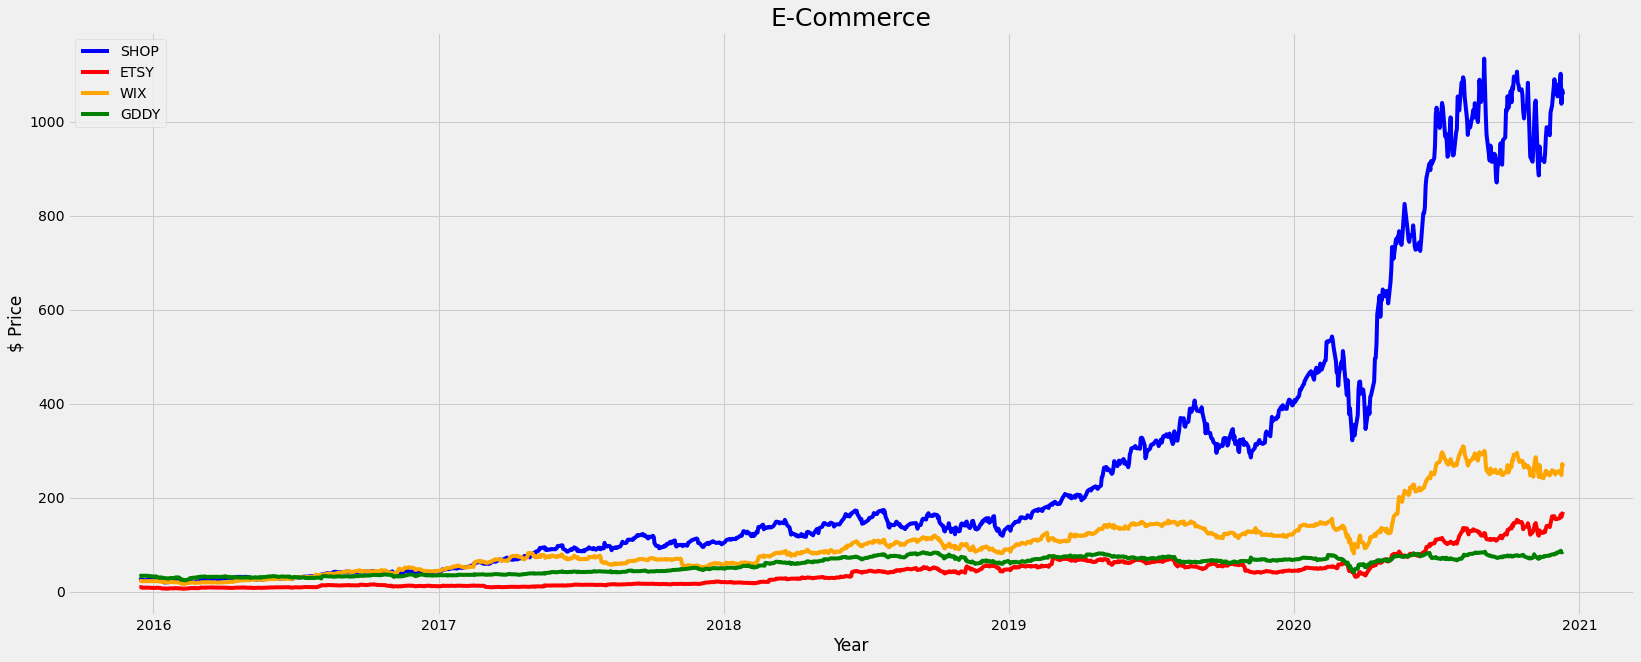

In [68]:
mpl.rcParams['figure.figsize']=(25,10)
e_com['Date']=pd.to_datetime(e_com['Date'])
e_com.set_index('Date',inplace=True)
plt.plot('SHOP', color='blue', data=e_com, label='SHOP')
plt.plot('ETSY', color='red', data=e_com, label='ETSY')
plt.plot('WIX', color='orange', data=e_com, label='WIX')
plt.plot('GDDY', color='green', data=e_com, label='GDDY')
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("$ Price")
plt.title('E-Commerce', fontsize=25)
# plt.figure(figsize=(20,20))
plt.show()

In [69]:
food = KR[['Date','Close']].merge(MCD[['Date','Close']], on='Date')
food.columns = ['Date', 'KR', 'MCD']


food = food.merge(NSGRY[['Date','Close']], on='Date')
food.columns = ['Date', 'KR', 'MCD', 'NSGRY']


food = food.merge(SBUX[['Date','Close']], on='Date')
food.columns = ['Date', 'KR', 'MCD', 'NSGRY', 'SBUX']
food.head() 

,Date,KR,MCD,NSGRY,SBUX
0,2015-12-14,41.860001,116.260002,73.099998,59.919998
1,2015-12-15,42.310001,116.930000,73.599998,59.980000
2,2015-12-16,42.430000,117.839996,74.709999,60.349998
3,2015-12-17,41.939999,117.500000,73.860001,59.520000
4,2015-12-18,40.639999,116.660004,73.080002,58.619999


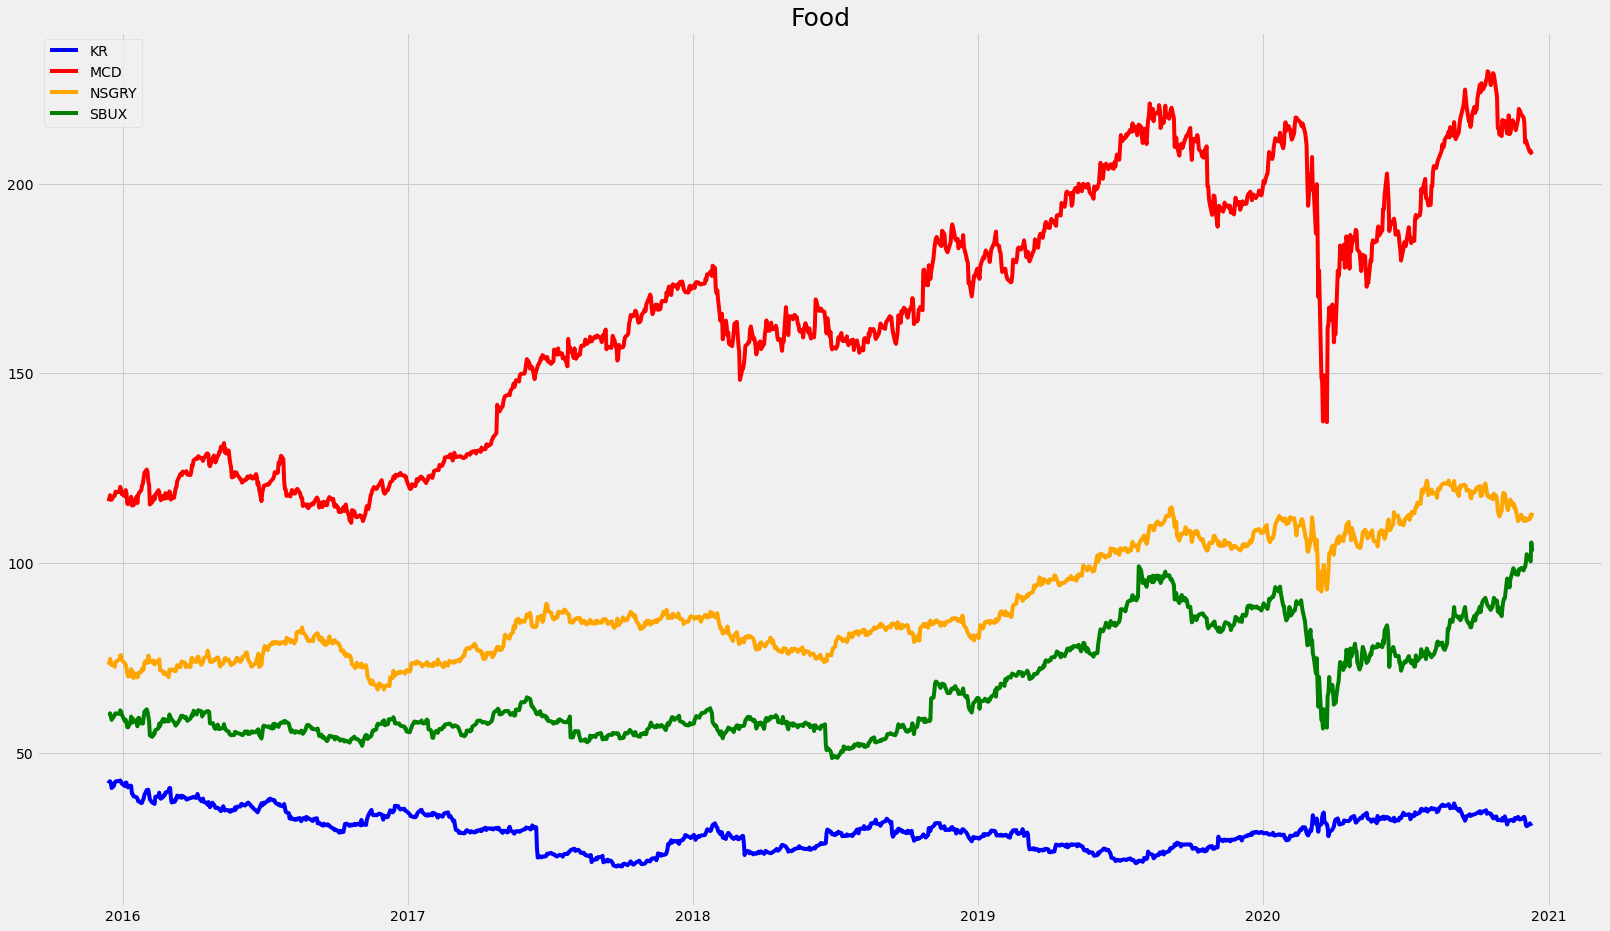

In [56]:
food['Date']=pd.to_datetime(food['Date'])
food.set_index('Date',inplace=True)
plt.plot('KR', color='blue', data=food, label='KR')
plt.plot('MCD', color='red', data=food, label='MCD')
plt.plot('NSGRY', color='orange', data=food, label='NSGRY')
plt.plot('SBUX', color='green', data=food, label='SBUX')
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("$ Price")
plt.title('Food', fontsize=25)
plt.show()

In [57]:
retail = BBY[['Date','Close']].merge(HD[['Date','Close']], on='Date')
retail.columns = ['Date', 'BBY', 'HD']

retail = retail.merge(WMT[['Date','Close']], on='Date')
retail.columns = ['Date', 'BBY', 'HD', 'WMT']

retail = retail.merge(TGT[['Date','Close']], on='Date')
retail.columns = ['Date', 'BBY', 'HD', 'WMT','TGT']
retail.head() 

,Date,BBY,HD,WMT,TGT
0,2015-12-14,29.900000,132.009995,60.389999,72.720001
1,2015-12-15,30.040001,131.289993,59.639999,72.980003
2,2015-12-16,30.700001,132.899994,60.299999,73.800003
3,2015-12-17,29.799999,131.350006,58.980000,72.330002
4,2015-12-18,29.040001,130.289993,58.849998,71.370003


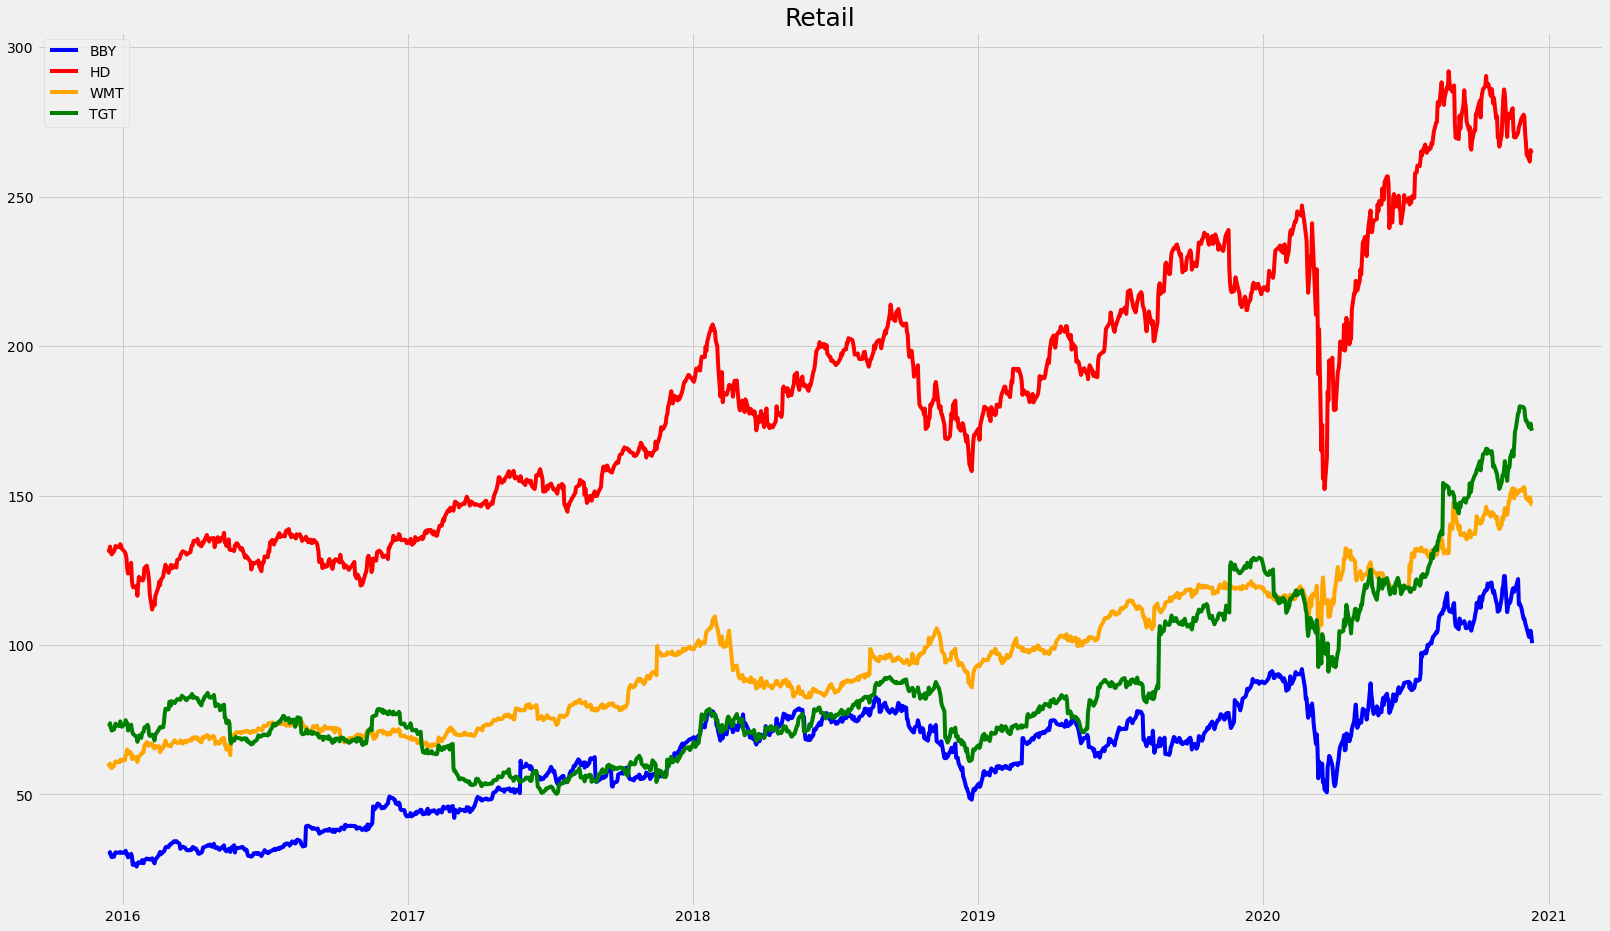

In [58]:
retail['Date']=pd.to_datetime(retail['Date'])
retail.set_index('Date',inplace=True)
plt.plot('BBY', color='blue', data=retail, label='BBY')
plt.plot('HD', color='red', data=retail, label='HD')
plt.plot('WMT', color='orange', data=retail, label='WMT')
plt.plot('TGT', color='green', data=retail, label='TGT')
plt.legend(loc='upper left')
plt.title('Retail', fontsize=25)
plt.show()

In [59]:
finance=C[['Date', 'Close']].merge(GDOT[['Date', 'Close']], on='Date')
finance.columns=['Date', 'C', 'GDOT']

finance=finance.merge(JPM[['Date', 'Close']], on='Date')
finance.columns=['Date', 'C', 'GDOT', 'JPM']

finance=finance.merge(PYPL[['Date', 'Close']], on='Date')
finance.columns=['Date', 'C', 'GDOT', 'JPM', 'PYPL']
finance.head()

,Date,C,GDOT,JPM,PYPL
0,2015-12-14,51.099998,16.040001,64.269997,35.009998
1,2015-12-15,52.520000,16.500000,66.099998,36.320000
2,2015-12-16,53.900002,16.719999,67.529999,35.980000
3,2015-12-17,52.840000,16.629999,66.279999,35.540001
4,2015-12-18,51.209999,16.230000,64.400002,34.980000


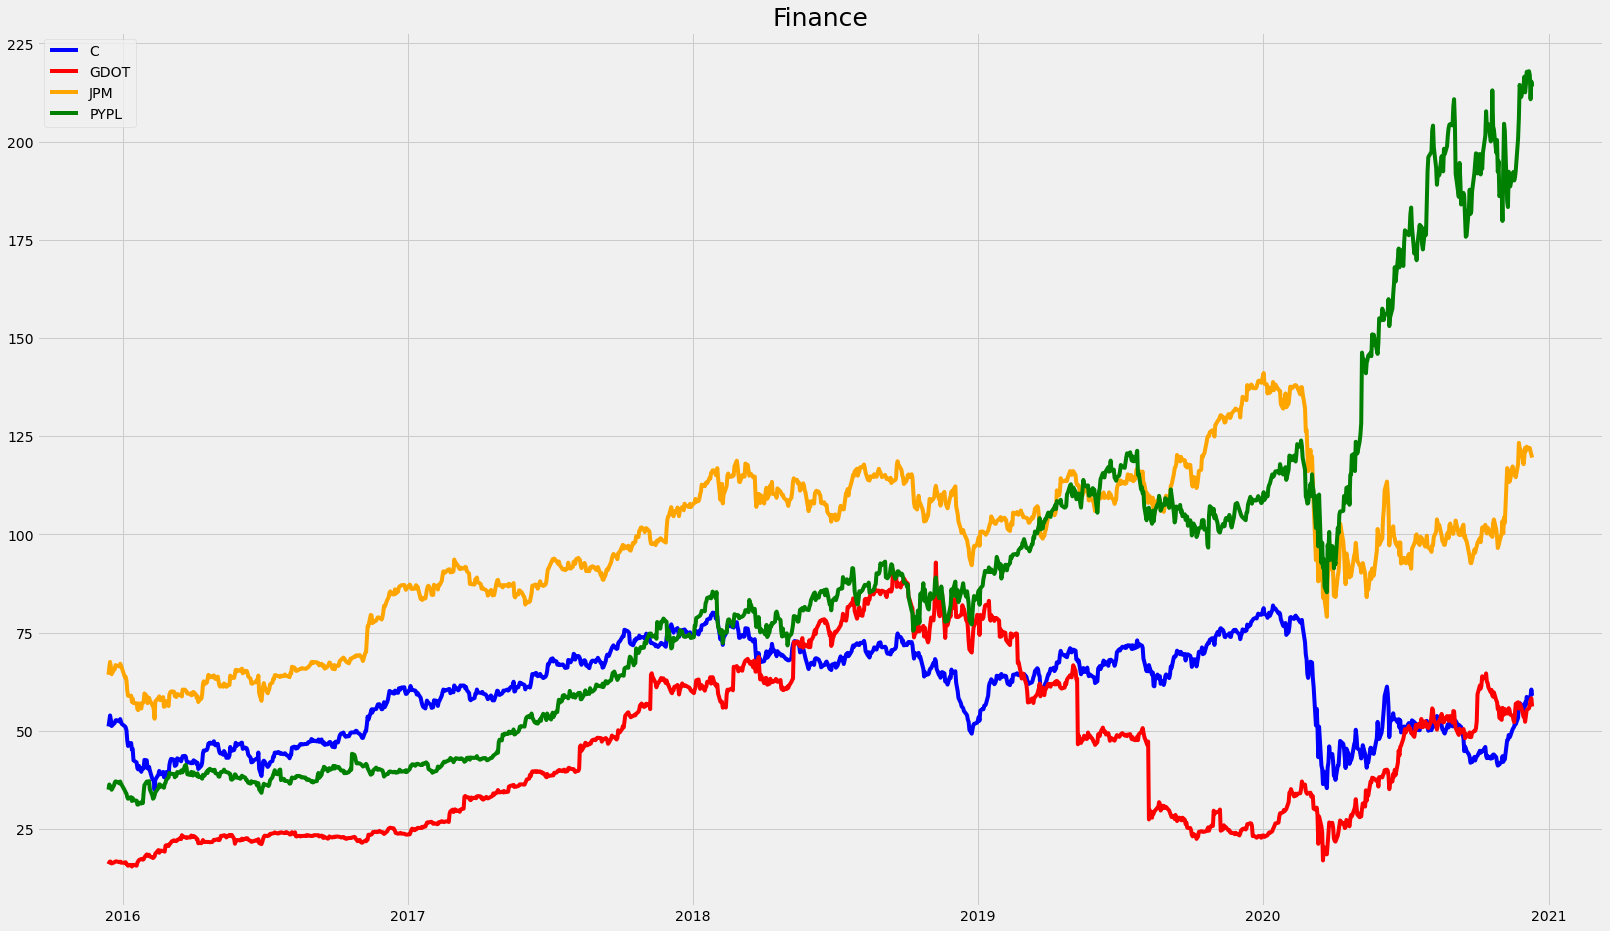

In [60]:
finance['Date']=pd.to_datetime(finance['Date'])
finance.set_index('Date',inplace=True)
plt.plot('C', color='blue', data=finance, label='C')
plt.plot('GDOT', color='red', data=finance, label='GDOT')
plt.plot('JPM', color='orange', data=finance, label='JPM')
plt.plot('PYPL', color='green', data=finance, label='PYPL')
plt.legend(loc='upper left')
plt.title('Finance', fontsize=25)
plt.show()

In [8]:
# x = SHOP['Date']
# y1 = SHOP['Open']
# y2 = SHOP['Close']
# ax = SHOP['Open'].plot()
# ax2 = ax.twinx()
# ax2.plot(y2, color='orange')
# plt.show()


In [9]:
# SHOP.set_index('Date', inplace=True)

# x = SHOP['Date']
# y1 = SHOP['Open']
# y2 = SHOP['Close']
# ax = SHOP['Open'].plot()
# ax2 = ax.twinx()
# ax2.plot(y2, color='orange')
# plt.show()

# SHOP['Date']=pd.to_datetime(SHOP['Date'])
# SHOP.set_index('Date',inplace=True)
# Shop_5D = SHOP.resample('5D').mean()
# Shop_5D.plot()


In [10]:
x = Shop_7D.index
y1 = Shop_7D['Open']
y2 = Shop_7D['Close']
ax = Shop_7D['Open'].plot()
ax = Shop_7D['Close'].plot()
ax2 = ax.twinx()
ax2.plot(y2, color='orange')
date_form = DateFormatter("%y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

NameError: name 'Shop_7D' is not defined

In [ ]:
fig, ax1 = plt.subplots(tight_layout=True) 
ax1.plot(x, y1)
ax1.twinx()
ax1.plot(x, y2)
plt.show()

In [ ]:
# plt.plot(SHOP['Date'], SHOP['Close'])
# plt.title('Shopify')
# plt.show()

# plt.plot(SHOP['Date'], SHOP['Close'])
# plt.title('Shopify')
# ax = plt.gca().get_xaxis()

# ax.set_major_locator(MultipleLocator(1))
# ax.set_minor_locator(MultipleLocator(0.1))
# ax.set_major_formatter(SHOP.DateFormatter('%Y-%M'))

# for item in ax.get_ticklabels():
#     item.set_rotation(45)

SHOP['Date']=pd.to_datetime(SHOP['Date'])
SHOP.set_index('Date',inplace=True)
plt.figure(figsize=(15,10))
plt.plot(SHOP.index, SHOP['Close'])
plt.xlabel("Date")
plt.ylabel("$ Price")
plt.title("Shopify")
plt.show()